<a href="https://colab.research.google.com/github/AIInspire/Hand-Gesture-Classification/blob/main/Training_and_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Access my drive
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load datasets

In [2]:
train_df = pd.read_csv('train_df.csv')
dev_df = pd.read_csv('dev_df.csv')
test_df = pd.read_csv('test_df.csv')

train_df.head()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,0.0,0.0,3.952055e-07,0.098025,-0.035313,-0.024145,0.202951,-0.089293,-0.036711,0.314607,...,-0.101898,-0.213498,-0.043010,-0.092303,-0.151523,-0.043307,-0.063439,-0.099102,-0.035569,15
1,0.0,0.0,3.073449e-07,-0.027681,-0.013087,-0.009034,-0.053119,-0.033356,-0.015538,-0.076192,...,0.041777,-0.065237,-0.027049,0.031424,-0.052896,-0.024753,0.022526,-0.043448,-0.021096,15
2,0.0,0.0,1.938102e-07,-0.039532,-0.014927,-0.017254,-0.075311,-0.034959,-0.029098,-0.102484,...,0.066524,-0.138803,-0.038567,0.084262,-0.157945,-0.044197,0.100029,-0.175690,-0.047938,8
3,0.0,0.0,4.852012e-08,-0.023671,-0.079358,-0.009695,-0.037987,-0.265784,-0.012068,-0.024191,...,0.002507,-0.595504,-0.018158,0.003985,-0.512774,-0.019942,0.006698,-0.412202,-0.020605,14
4,0.0,0.0,5.494857e-07,-0.126104,-0.054046,-0.004757,-0.153177,-0.136078,-0.014341,-0.070555,...,0.211904,-0.204862,-0.052404,0.196116,-0.178078,-0.042919,0.164033,-0.148812,-0.032127,17


In [3]:
x_train = train_df.drop(columns=['label'])
y_train = train_df['label']

x_dev = dev_df.drop(columns=['label'])
y_dev = dev_df['label']

x_test = test_df.drop(columns=['label'])
y_test = test_df['label']

In [4]:
final_x_train_df = pd.concat([x_train, x_dev])
final_y_train_df = pd.concat([y_train, y_dev])

In [5]:
print(x_train.head())
print(y_train.head())

    x1   y1            z1        x2        y2        z2        x3        y3  \
0  0.0  0.0  3.952055e-07  0.098025 -0.035313 -0.024145  0.202951 -0.089293   
1  0.0  0.0  3.073449e-07 -0.027681 -0.013087 -0.009034 -0.053119 -0.033356   
2  0.0  0.0  1.938102e-07 -0.039532 -0.014927 -0.017254 -0.075311 -0.034959   
3  0.0  0.0  4.852012e-08 -0.023671 -0.079358 -0.009695 -0.037987 -0.265784   
4  0.0  0.0  5.494857e-07 -0.126104 -0.054046 -0.004757 -0.153177 -0.136078   

         z3        x4  ...       z18       x19       y19       z19       x20  \
0 -0.036711  0.314607  ... -0.019162 -0.101898 -0.213498 -0.043010 -0.092303   
1 -0.015538 -0.076192  ... -0.019638  0.041777 -0.065237 -0.027049  0.031424   
2 -0.029098 -0.102484  ... -0.027482  0.066524 -0.138803 -0.038567  0.084262   
3 -0.012068 -0.024191  ... -0.009977  0.002507 -0.595504 -0.018158  0.003985   
4 -0.014341 -0.070555  ... -0.046963  0.211904 -0.204862 -0.052404  0.196116   

        y20       z20       x21       y21   

In [6]:
print(x_train.shape)
print(y_train.shape)

print(x_dev.shape)
print(y_dev.shape)

print(x_test.shape)
print(y_test.shape)

(17972, 63)
(17972,)
(3852, 63)
(3852,)
(3851, 63)
(3851,)


# Trying models

First, We will make a function to return accuracy, precision, recall, and F1-score for each model

In [7]:
def evaluate_model(model, x, y):
  y_pred = model.predict(x)
  accuracy = accuracy_score(y, y_pred)
  precision = precision_score(y, y_pred, average='weighted')
  recall = recall_score(y, y_pred, average='weighted')
  f1 = f1_score(y, y_pred, average='weighted')

  results = pd.DataFrame({
      'Model': [model],
      'Accuracy': [accuracy],
      'Precision': [precision],
      'Recall': [recall],
      'F1-score': [f1]
  })

  return results

Function to Appean results to a csv file in **Drive**

In [8]:
# fun to open csv file in google drive if exist and append the dataframe on it, if not exsit create one
def append_to_csv(df, file_path='/content/drive/My Drive/scores_after_tuning.csv'):
    if os.path.exists(file_path):
        existing_df = pd.read_csv(file_path)
        updated_df = pd.concat([existing_df, df], ignore_index=True)
    else:
        updated_df = df

    updated_df.to_csv(file_path, index=False)
    print(f"Data saved to {file_path}")

## **1. Logistic regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, y_train)

log_reg_score = evaluate_model(logistic_regression, x_dev, y_dev)
print(log_reg_score)
append_to_csv(log_reg_score, file_path='/content/drive/My Drive/scores using defualt hyperparas.csv')

                  Model  Accuracy  Precision    Recall  F1-score
0  LogisticRegression()  0.799585   0.798508  0.799585  0.797764
Data saved to /content/drive/My Drive/scores using defualt hyperparas.csv


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


*Logistic regression -- Hyperparameter Tuning Trials*

In [ ]:
'''
1st trial:
incresing max_iter from 100 to 1500
max_iter = [100, 200, 500, 1000, 1500]
'''
max_iter_values = [100, 200, 500, 1000, 1500]

for max_iter in max_iter_values:
  logistic_regression = LogisticRegression(max_iter=max_iter)
  logistic_regression.fit(x_train, y_train)

  print(f"Evaluation when max_iter = {max_iter}:")
  print(evaluate_model(logistic_regression, x_dev, y_dev))
  print()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Evaluation when max_iter = 100:
                  Model  Accuracy  Precision    Recall  F1-score
0  LogisticRegression()  0.799585   0.798508  0.799585  0.797764

Evaluation when max_iter = 200:
                              Model  Accuracy  Precision    Recall  F1-score
0  LogisticRegression(max_iter=200)  0.803479   0.802435  0.803479   0.80188

Evaluation when max_iter = 500:
                              Model  Accuracy  Precision    Recall  F1-score
0  LogisticRegression(max_iter=500)  0.803479   0.802435  0.803479   0.80188

Evaluation when max_iter = 1000:
                               Model  Accuracy  Precision    Recall  F1-score
0  LogisticRegression(max_iter=1000)  0.803479   0.802435  0.803479   0.80188

Evaluation when max_iter = 1500:
                               Model  Accuracy  Precision    Recall  F1-score
0  LogisticRegression(max_iter=1500)  0.803479   0.802435  0.803479   0.80188



* Increasing max_iter from 200 to 1500 made no further improvement.

* After max_iter=200, the model converged and stabilized.

* So, setting **max_iter=500** is sufficient for convergence and performance.

In [ ]:
'''
2st trial:
Try values like C = [0.01, 0.1, 1, 10]
'''
c_values = [0.01, 0.1, 1, 10]
best_max_iter = 500

for c in c_values:
  logistic_regression = LogisticRegression(C=c, max_iter=best_max_iter)
  logistic_regression.fit(x_train, y_train)

  print(f"Evaluation when C = {c}:")
  print(evaluate_model(logistic_regression, x_dev, y_dev))
  print()

Evaluation when C = 0.01:
                                      Model  Accuracy  Precision    Recall  \
0  LogisticRegression(C=0.01, max_iter=500)  0.458463   0.473855  0.458463   

   F1-score  
0  0.417058  



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Evaluation when C = 0.1:
                                     Model  Accuracy  Precision    Recall  \
0  LogisticRegression(C=0.1, max_iter=500)  0.694704   0.700307  0.694704   

   F1-score  
0  0.688569  

Evaluation when C = 1:
                                   Model  Accuracy  Precision    Recall  \
0  LogisticRegression(C=1, max_iter=500)  0.803479   0.802435  0.803479   

   F1-score  
0   0.80188  

Evaluation when C = 10:
                                    Model  Accuracy  Precision    Recall  \
0  LogisticRegression(C=10, max_iter=500)  0.866563   0.866927  0.866563   

   F1-score  
0  0.866534  





1.   C = 0.01
      * Low accuracy and recall indicate that the model is underfitting
      * Not a good choice due to underfitting
      
2.   C = 0.1
      * Accuracy has improved significantly
      * Better than C=0.01, but needs parameter tuning to resolve convergence issues

3.   C = 1
      * Further improvement in accuracy
      * A strong candidate for the best choice so far

4.   C = 10
      * Highest accuracy and best precision/recall
      * This model gives the best performance, but the warning suggests it might need fine-tuning

**Which C Value Should You Use?**

We will Try
* C = 1 -- Best balance between accuracy and stability, no warning

* C = 10 is good but may need max_iter adjustments




In [ ]:
'''
3st trial:
solver = ['lbfgs', 'liblinear', 'saga']
'''
solver_values = ['lbfgs', 'liblinear', 'saga']
best_max_iter = 500
c_values = [1, 10]

for solver in solver_values:
  for c in c_values:
    logistic_regression = LogisticRegression(solver=solver, C=c, max_iter=best_max_iter)
    logistic_regression.fit(x_train, y_train)

    print(f"Evaluation when solver = {solver} and C = {c}:")
    print(evaluate_model(logistic_regression, x_dev, y_dev))
    print()

Evaluation when solver = lbfgs and C = 1:
                                   Model  Accuracy  Precision    Recall  \
0  LogisticRegression(C=1, max_iter=500)  0.803479   0.802435  0.803479   

   F1-score  
0   0.80188  

Evaluation when solver = lbfgs and C = 10:
                                    Model  Accuracy  Precision    Recall  \
0  LogisticRegression(C=10, max_iter=500)  0.866563   0.866927  0.866563   

   F1-score  
0  0.866534  

Evaluation when solver = liblinear and C = 1:
                                               Model  Accuracy  Precision  \
0  LogisticRegression(C=1, max_iter=500, solver='...   0.78297   0.784273   

    Recall  F1-score  
0  0.78297  0.780808  

Evaluation when solver = liblinear and C = 10:
                                               Model  Accuracy  Precision  \
0  LogisticRegression(C=10, max_iter=500, solver=...  0.842939   0.843847   

     Recall  F1-score  
0  0.842939  0.842599  



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Evaluation when solver = saga and C = 1:
                                               Model  Accuracy  Precision  \
0  LogisticRegression(C=1, max_iter=500, solver='...  0.784787   0.784291   

     Recall  F1-score  
0  0.784787  0.782633  

Evaluation when solver = saga and C = 10:
                                               Model  Accuracy  Precision  \
0  LogisticRegression(C=10, max_iter=500, solver=...  0.794393   0.793545   

     Recall  F1-score  
0  0.794393  0.792867  



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(




*   lbfgs with C=10 is the best performer
*   liblinear Performed Well, but Not as Good as lbfgs



In [ ]:
'''
4nd trial:
penalty : Compare "l1", "l2".
with C = [1, 10]
solver = ['liblinear', 'lbfgs']
max_iter = 500
'''
penalty_values = ['l2', 'l1']
solver_values = ['liblinear', 'lbfgs']
c_values = [1, 10]
best_max_iter = 500

for solver in solver_values:
  for penalty in penalty_values:
    for c in c_values:
      logistic_regression = LogisticRegression(penalty=penalty, C=c, solver=solver, max_iter=best_max_iter)
      logistic_regression.fit(x_train, y_train)

      print(f"Evaluation when solver = {solver}, penalty = {penalty} and C = {c}:")
      print(evaluate_model(logistic_regression, x_dev, y_dev))
      print()

Evaluation when solver = liblinear, penalty = l2 and C = 1:
                                               Model  Accuracy  Precision  \
0  LogisticRegression(C=1, max_iter=500, solver='...   0.78297   0.784273   

    Recall  F1-score  
0  0.78297  0.780808  

Evaluation when solver = liblinear, penalty = l2 and C = 10:
                                               Model  Accuracy  Precision  \
0  LogisticRegression(C=10, max_iter=500, solver=...  0.842939   0.843847   

     Recall  F1-score  
0  0.842939  0.842599  

Evaluation when solver = liblinear, penalty = l1 and C = 1:
                                               Model  Accuracy  Precision  \
0  LogisticRegression(C=1, max_iter=500, penalty=...  0.859813   0.860482   

     Recall  F1-score  
0  0.859813  0.859553  

Evaluation when solver = liblinear, penalty = l1 and C = 10:
                                               Model  Accuracy  Precision  \
0  LogisticRegression(C=10, max_iter=500, penalty...    0.9081   0.9084

ValueError: Solver lbfgs supports only 'l2' or None penalties, got l1 penalty.

**The liblinear solver with l1 penalty and C = 10 performs the best overall, achieving the highest scores in all metrics**

In [ ]:
'''
Last trial:
we will use the best found parameters for the logistic regression model with dataset StandardScaler
'''
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_dev_scaled = scaler.transform(x_dev)

logistic_regression = LogisticRegression(penalty='l2', C=10, solver='liblinear', max_iter=500)
logistic_regression.fit(X_train_scaled, y_train)

print(evaluate_model(logistic_regression, X_dev_scaled, y_dev))

                                               Model  Accuracy  Precision  \
0  LogisticRegression(C=10, max_iter=500, solver=...  0.921599   0.921947   

     Recall  F1-score  
0  0.921599  0.921418  


**Logistic Regression — Best Hyperparameter Combination:**

1. Apply StandardScaler() to standardize the datasets.

2. Set max_iter = 500 for a sufficient number of iterations.

3. Use solver = 'liblinear' for efficient optimization.

4. Set the regularization parameter C = 10 to balance bias and variance.

5. Apply penalty = 'l2' to use L2 regularization, which helps prevent overfitting.



In [ ]:
# Final Evaluation on the test_df
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(final_x_train_df)
X_test_scaled = scaler.transform(x_test)

logistic_regression = LogisticRegression(penalty='l2', C=10, solver='liblinear', max_iter=500)
logistic_regression.fit(X_train_scaled, final_y_train_df)

log_reg_score = evaluate_model(logistic_regression, X_test_scaled, y_test)
print(log_reg_score)
append_to_csv(log_reg_score)

                                               Model  Accuracy  Precision  \
0  LogisticRegression(C=10, max_iter=500, solver=...  0.930667   0.930706   

     Recall  F1-score  
0  0.930667  0.930359  
Data saved to /content/drive/My Drive/scores_after_tuning.csv


##**2. Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)

dt_score = evaluate_model(decision_tree, x_dev, y_dev)
print(dt_score)
append_to_csv(dt_score, file_path='/content/drive/My Drive/scores using defualt hyperparas.csv')

                      Model  Accuracy  Precision    Recall  F1-score
0  DecisionTreeClassifier()  0.853583   0.855773  0.853583  0.854184
Data saved to /content/drive/My Drive/scores using defualt hyperparas.csv


*Decision Tree -- Hyperparameter tuning trials*

In [ ]:
'''
1st trial:
'criterion': ['gini', 'entropy']
'''

criterion_values = ['gini', 'entropy']

for criterion in criterion_values:
  decision_tree = DecisionTreeClassifier(criterion=criterion)
  decision_tree.fit(x_train, y_train)

  print(f"Evaluation when criterion = {criterion}:")
  print(evaluate_model(decision_tree, x_dev, y_dev))
  print()

Evaluation when criterion = gini:
                      Model  Accuracy  Precision    Recall  F1-score
0  DecisionTreeClassifier()  0.849429   0.851069  0.849429  0.849727

Evaluation when criterion = entropy:
                                         Model  Accuracy  Precision    Recall  \
0  DecisionTreeClassifier(criterion='entropy')  0.869159   0.870129  0.869159   

   F1-score  
0  0.869367  



**Switching to entropy has resulted in a noticeable improvement in all metrics**

In [ ]:
'''
2nd trial:
max_depth': [None, 5, 10, 20, 50]
'''

max_depth_values = [None, 5, 10, 20, 50, 60]

for max_depth in max_depth_values:
  for criterion in criterion_values:
    decision_tree = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth)
    decision_tree.fit(x_train, y_train)

    print(f"Evaluation when max_depth = {max_depth} and criterion = {criterion}:")
    print(evaluate_model(decision_tree, x_dev, y_dev))
    print()

Evaluation when max_depth = None and criterion = gini:
                      Model  Accuracy  Precision    Recall  F1-score
0  DecisionTreeClassifier()  0.848131   0.849891  0.848131  0.848453

Evaluation when max_depth = None and criterion = entropy:
                                         Model  Accuracy  Precision    Recall  \
0  DecisionTreeClassifier(criterion='entropy')  0.864486   0.866229  0.864486   

   F1-score  
0  0.864904  

Evaluation when max_depth = 5 and criterion = gini:
                                 Model  Accuracy  Precision    Recall  \
0  DecisionTreeClassifier(max_depth=5)  0.420301   0.331413  0.420301   

   F1-score  
0   0.34901  



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Evaluation when max_depth = 5 and criterion = entropy:
                                               Model  Accuracy  Precision  \
0  DecisionTreeClassifier(criterion='entropy', ma...  0.531672   0.545335   

     Recall  F1-score  
0  0.531672  0.505554  



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Evaluation when max_depth = 10 and criterion = gini:
                                  Model  Accuracy  Precision    Recall  \
0  DecisionTreeClassifier(max_depth=10)  0.705607   0.761448  0.705607   

   F1-score  
0  0.716794  

Evaluation when max_depth = 10 and criterion = entropy:
                                               Model  Accuracy  Precision  \
0  DecisionTreeClassifier(criterion='entropy', ma...  0.820093   0.830566   

     Recall  F1-score  
0  0.820093  0.822113  

Evaluation when max_depth = 20 and criterion = gini:
                                  Model  Accuracy  Precision    Recall  \
0  DecisionTreeClassifier(max_depth=20)  0.851246   0.853648  0.851246   

   F1-score  
0   0.85193  

Evaluation when max_depth = 20 and criterion = entropy:
                                               Model  Accuracy  Precision  \
0  DecisionTreeClassifier(criterion='entropy', ma...   0.86838   0.869643   

    Recall  F1-score  
0  0.86838  0.868719  

Evaluation when max_

* Entropy leads to higher accuracy, precision, recall, and F1-score in almost every case
* Accuracy peaks around max_depth=20 or max_depth=50
*  **Optimal depth = 20 with entropy, balancing performance and complexity**



In [ ]:
'''
3rd trial:
min_samples_split: [2, 5, 10, 20]
'''
min_samples_split_values = [2, 5, 10, 20]
criterion = 'entropy'
max_depth = 20

for min_samples_split in min_samples_split_values:
  decision_tree = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, min_samples_split=min_samples_split)
  decision_tree.fit(x_train, y_train)

  print(f"Evaluation when min_samples_split = {min_samples_split}:")
  print(evaluate_model(decision_tree, x_dev, y_dev))
  print()


Evaluation when min_samples_split = 2:
                                               Model  Accuracy  Precision  \
0  DecisionTreeClassifier(criterion='entropy', ma...  0.870457   0.871471   

     Recall  F1-score  
0  0.870457  0.870588  

Evaluation when min_samples_split = 5:
                                               Model  Accuracy  Precision  \
0  DecisionTreeClassifier(criterion='entropy', ma...  0.868899    0.87017   

     Recall  F1-score  
0  0.868899  0.869108  

Evaluation when min_samples_split = 10:
                                               Model  Accuracy  Precision  \
0  DecisionTreeClassifier(criterion='entropy', ma...  0.866563    0.86828   

     Recall  F1-score  
0  0.866563  0.866964  

Evaluation when min_samples_split = 20:
                                               Model  Accuracy  Precision  \
0  DecisionTreeClassifier(criterion='entropy', ma...  0.861371     0.8638   

     Recall  F1-score  
0  0.861371  0.861937  



**The default value min_samples_split=2 gives the best performance across all metrics.**

In [ ]:
'''
4th trial:
min_samples_leaf = [1, 2, 4]
'''
min_samples_leaf_values = [1, 2, 4, 6]
criterion = 'entropy'
max_depth = 20
min_samples_split = 2

for min_samples_leaf_values in min_samples_leaf_values:
  decision_tree = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf_values)
  decision_tree.fit(x_train, y_train)

  print(f"Evaluation when min_samples_leaf = {min_samples_leaf_values}:")
  print(evaluate_model(decision_tree, x_dev, y_dev))
  print()

Evaluation when min_samples_leaf = 1:
                                               Model  Accuracy  Precision  \
0  DecisionTreeClassifier(criterion='entropy', ma...  0.871755   0.873293   

     Recall  F1-score  
0  0.871755  0.872148  
Evaluation when min_samples_leaf = 2:
                                               Model  Accuracy  Precision  \
0  DecisionTreeClassifier(criterion='entropy', ma...  0.866563   0.868499   

     Recall  F1-score  
0  0.866563  0.866874  
Evaluation when min_samples_leaf = 4:
                                               Model  Accuracy  Precision  \
0  DecisionTreeClassifier(criterion='entropy', ma...  0.874091    0.87598   

     Recall  F1-score  
0  0.874091  0.874428  
Evaluation when min_samples_leaf = 6:
                                               Model  Accuracy  Precision  \
0  DecisionTreeClassifier(criterion='entropy', ma...  0.877985   0.880042   

     Recall  F1-score  
0  0.877985  0.878314  


**Performance peaks at min_samples_leaf = 6, where the model achieves the highest scores across all metrics**

In [ ]:
'''
5th trial:
max_features = ['auto', 'sqrt', 'log2', None]
'''

max_features_values = ['sqrt', 'log2', None, 0.5, 5, 50]
criterion = 'entropy'
max_depth = 20
min_samples_split = 2
min_samples_leaf = 6

for max_features in max_features_values:
  decision_tree = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, max_features=max_features)

  decision_tree.fit(x_train, y_train)

  print(f"Evaluation when max_features = {max_features}:")
  print(evaluate_model(decision_tree, x_dev, y_dev))
  print()

Evaluation when max_features = sqrt:
                                               Model  Accuracy  Precision  \
0  DecisionTreeClassifier(criterion='entropy', ma...  0.753894   0.754416   

     Recall  F1-score  
0  0.753894  0.753429  

Evaluation when max_features = log2:
                                               Model  Accuracy  Precision  \
0  DecisionTreeClassifier(criterion='entropy', ma...  0.759346   0.762974   

     Recall  F1-score  
0  0.759346  0.759955  

Evaluation when max_features = None:
                                               Model  Accuracy  Precision  \
0  DecisionTreeClassifier(criterion='entropy', ma...  0.876687   0.878254   

     Recall  F1-score  
0  0.876687  0.876807  

Evaluation when max_features = 0.5:
                                               Model  Accuracy  Precision  \
0  DecisionTreeClassifier(criterion='entropy', ma...   0.84891   0.850665   

    Recall  F1-score  
0  0.84891  0.849023  

Evaluation when max_features = 5:
     

**max_features = None gives the highest performance across all metrics**

In [ ]:
'''
6th trial:
 'max_leaf_nodes': [None, 10, 20, 50]
'''

max_leaf_nodes_values = [None, 10, 20, 50, 500]
criterion = 'entropy'
max_depth = 20
min_samples_split = 2
min_samples_leaf = 6
max_features = None

for max_leaf_nodes in max_leaf_nodes_values:
  decision_tree = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, max_features=max_features, max_leaf_nodes=max_leaf_nodes)

  decision_tree.fit(x_train, y_train)

  print(f"Evaluation when max_leaf_nodes = {max_leaf_nodes}:")
  print(evaluate_model(decision_tree, x_dev, y_dev))

Evaluation when max_leaf_nodes = None:
                                               Model  Accuracy  Precision  \
0  DecisionTreeClassifier(criterion='entropy', ma...  0.877726   0.879648   

     Recall  F1-score  
0  0.877726  0.877913  
Evaluation when max_leaf_nodes = 10:
                                               Model  Accuracy  Precision  \
0  DecisionTreeClassifier(criterion='entropy', ma...   0.38162   0.198017   

    Recall  F1-score  
0  0.38162  0.252898  


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Evaluation when max_leaf_nodes = 20:
                                               Model  Accuracy  Precision  \
0  DecisionTreeClassifier(criterion='entropy', ma...   0.51324   0.506059   

    Recall  F1-score  
0  0.51324   0.47888  


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Evaluation when max_leaf_nodes = 50:
                                               Model  Accuracy  Precision  \
0  DecisionTreeClassifier(criterion='entropy', ma...   0.67108   0.670194   

    Recall  F1-score  
0  0.67108  0.660924  
Evaluation when max_leaf_nodes = 500:
                                               Model  Accuracy  Precision  \
0  DecisionTreeClassifier(criterion='entropy', ma...  0.873053   0.875901   

     Recall  F1-score  
0  0.873053  0.873371  


**max_leaf_nodes = None is again the best, with an F1-score of 87.79%**

**DecisionTreeClassifier -- Best Hyperparameters**

* criterion='entropy',
* max_depth=20,
* min_samples_split=2,
* min_samples_leaf=6,
* max_features=None,
* max_leaf_nodes=None

In [ ]:
# Decision Tree model using the best hyperparameters and evaluate it on test_df
decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_split=2, min_samples_leaf=6, max_features=None, max_leaf_nodes=None)
decision_tree.fit(final_x_train_df, final_y_train_df)

decision_tree_score = evaluate_model(decision_tree, x_test, y_test)
print(decision_tree_score)
append_to_csv(decision_tree_score)

                                               Model  Accuracy  Precision  \
0  DecisionTreeClassifier(criterion='entropy', ma...  0.868086   0.869012   

     Recall  F1-score  
0  0.868086  0.868076  
Data saved to /content/drive/My Drive/scores_after_tuning.csv


##**3. Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)

rf_score = evaluate_model(random_forest, x_dev, y_dev)
print(rf_score)
append_to_csv(rf_score, file_path='/content/drive/My Drive/scores using defualt hyperparas.csv')

                                               Model  Accuracy  Precision  \
0  (DecisionTreeClassifier(max_features='sqrt', r...  0.938733   0.939686   

     Recall  F1-score  
0  0.938733  0.938756  
Data saved to /content/drive/My Drive/scores using defualt hyperparas.csv


*Random Forest -- hyperparameter tuning*

In [ ]:
'''
1st trial:
criterion = ['gini', 'entropy']
'''

criterion_values = ['gini', 'entropy']

for criterion in criterion_values:
  random_forest = RandomForestClassifier(criterion=criterion)
  random_forest.fit(x_train, y_train)

  print(f"Evaluation when criterion = {criterion}:")
  print(evaluate_model(random_forest, x_dev, y_dev))
  print()

Evaluation when criterion = gini:
                                               Model  Accuracy  Precision  \
0  (DecisionTreeClassifier(max_features='sqrt', r...  0.941329   0.942272   

     Recall  F1-score  
0  0.941329  0.941415  

Evaluation when criterion = entropy:
                                               Model  Accuracy  Precision  \
0  (DecisionTreeClassifier(criterion='entropy', m...  0.935618   0.936264   

     Recall  F1-score  
0  0.935618  0.935678  



In [ ]:
'''
2st trial:
n_estimators = [50, 100, 200, 300, 500]
'''

n_estimators_values = [50, 100, 200, 300, 500]
criterion = 'gini'

for n_estimators in n_estimators_values:
  random_forest = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion)
  random_forest.fit(x_train, y_train)

  print(f"Evaluation when n_estimators = {n_estimators}:")
  print(evaluate_model(random_forest, x_dev, y_dev))
  print()


Evaluation when n_estimators = 50:
                                               Model  Accuracy  Precision  \
0  (DecisionTreeClassifier(max_features='sqrt', r...  0.934839   0.935595   

     Recall  F1-score  
0  0.934839  0.934868  

Evaluation when n_estimators = 100:
                                               Model  Accuracy  Precision  \
0  (DecisionTreeClassifier(max_features='sqrt', r...  0.937954   0.938769   

     Recall  F1-score  
0  0.937954  0.937994  

Evaluation when n_estimators = 200:
                                               Model  Accuracy  Precision  \
0  (DecisionTreeClassifier(max_features='sqrt', r...  0.938993   0.940046   

     Recall  F1-score  
0  0.938993  0.939161  

Evaluation when n_estimators = 300:
                                               Model  Accuracy  Precision  \
0  (DecisionTreeClassifier(max_features='sqrt', r...  0.937954   0.938854   

     Recall  F1-score  
0  0.937954  0.938039  

Evaluation when n_estimators = 500:
     

**The best performance is achieved when n_estimators = 500**

In [ ]:
'''
3th trial:
max_depth = [None, 10, 20, 30, 50]
'''
max_leaf_nodes_values = [None, 10, 20, 30, 50]
criterion = 'gini'
n_estimators = 500

for max_depth in max_leaf_nodes_values:
  random_forest = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth)
  random_forest.fit(x_train, y_train)

  print(f"Evaluation when max_depth = {max_depth}:")
  print(evaluate_model(random_forest, x_dev, y_dev))
  print()

Evaluation when max_depth = None:
                                               Model  Accuracy  Precision  \
0  (DecisionTreeClassifier(max_features='sqrt', r...  0.942108   0.942626   

     Recall  F1-score  
0  0.942108  0.942131  

Evaluation when max_depth = 10:
                                               Model  Accuracy  Precision  \
0  (DecisionTreeClassifier(max_depth=10, max_feat...   0.86812   0.871832   

    Recall  F1-score  
0  0.86812  0.866858  

Evaluation when max_depth = 20:
                                               Model  Accuracy  Precision  \
0  (DecisionTreeClassifier(max_depth=20, max_feat...  0.940031   0.940635   

     Recall  F1-score  
0  0.940031  0.940101  

Evaluation when max_depth = 30:
                                               Model  Accuracy  Precision  \
0  (DecisionTreeClassifier(max_depth=30, max_feat...  0.942368   0.943029   

     Recall  F1-score  
0  0.942368  0.942399  

Evaluation when max_depth = 50:
                        

**Best Performance: The best performance is observed when max_depth = None**

In [ ]:
'''
4th trial:
max_features = ['auto', 'sqrt', 'log2', None]
'''

max_features_values = ['sqrt', 'log2', None, 0.5, 5, 50]
criterion = 'gini'
n_estimators = 500
max_depth = None

for max_features in max_features_values:
  random_forest = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth, max_features=max_features)
  random_forest.fit(x_train, y_train)

  print(f"Evaluation when max_features = {max_features}:")
  print(evaluate_model(random_forest, x_dev, y_dev))
  print()

Evaluation when max_features = sqrt:
                                               Model  Accuracy  Precision  \
0  (DecisionTreeClassifier(max_features='sqrt', r...  0.943146   0.943844   

     Recall  F1-score  
0  0.943146   0.94318  

Evaluation when max_features = log2:
                                               Model  Accuracy  Precision  \
0  (DecisionTreeClassifier(max_features='log2', r...  0.937695   0.938641   

     Recall  F1-score  
0  0.937695  0.937784  

Evaluation when max_features = None:
                                               Model  Accuracy  Precision  \
0  (DecisionTreeClassifier(random_state=89961200)...  0.923157   0.924555   

     Recall  F1-score  
0  0.923157  0.923413  

Evaluation when max_features = 0.5:
                                               Model  Accuracy  Precision  \
0  (DecisionTreeClassifier(max_features=0.5, rand...  0.943406   0.944241   

     Recall  F1-score  
0  0.943406   0.94353  

Evaluation when max_features = 5:
   

**Best Performance: The best performance is observed when max_features = ['sqr', 0.5]**

In [ ]:
'''
5th trial:
min_samples_split = [2, 5, 10, 20]
with max_features = 'sqrt'
'''
min_samples_split_values = [2, 5, 10, 20]
criterion = 'gini'
n_estimators = 500
max_depth = None
max_features = 'sqrt'

for min_samples_split in min_samples_split_values:
  random_forest = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth, max_features=max_features, min_samples_split=min_samples_split)
  random_forest.fit(x_train, y_train)

  print(f"Evaluation when min_samples_split = {min_samples_split}:")
  print(evaluate_model(random_forest, x_dev, y_dev))
  print()

Evaluation when min_samples_split = 2:
                                               Model  Accuracy  Precision  \
0  (DecisionTreeClassifier(max_features='sqrt', r...  0.941848    0.94259   

     Recall  F1-score  
0  0.941848  0.941902  

Evaluation when min_samples_split = 5:
                                               Model  Accuracy  Precision  \
0  (DecisionTreeClassifier(max_features='sqrt', m...  0.939772   0.940489   

     Recall  F1-score  
0  0.939772  0.939855  

Evaluation when min_samples_split = 10:
                                               Model  Accuracy  Precision  \
0  (DecisionTreeClassifier(max_features='sqrt', m...  0.938214    0.93881   

     Recall  F1-score  
0  0.938214   0.93824  

Evaluation when min_samples_split = 20:
                                               Model  Accuracy  Precision  \
0  (DecisionTreeClassifier(max_features='sqrt', m...  0.931464   0.932013   

     Recall  F1-score  
0  0.931464  0.931425  



**Best score(0.941848): when min_samples_split=2 and max_features='sqrt'**

In [ ]:
'''
6th trial:
min_samples_split = [2, 5, 10, 20]
with max_features = 0.5
'''
min_samples_split_values = [2, 5, 10, 20]
criterion = 'gini'
n_estimators = 500
max_depth = None
max_features = 0.5

for min_samples_split in min_samples_split_values:
  random_forest = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth, max_features=max_features, min_samples_split=min_samples_split)
  random_forest.fit(x_train, y_train)

  print(f"Evaluation when min_samples_split = {min_samples_split}:")
  print(evaluate_model(random_forest, x_dev, y_dev))
  print()

Evaluation when min_samples_split = 2:
                                               Model  Accuracy  Precision  \
0  (DecisionTreeClassifier(max_features=0.5, rand...  0.943146   0.943952   

     Recall  F1-score  
0  0.943146  0.943262  

Evaluation when min_samples_split = 5:
                                               Model  Accuracy  Precision  \
0  (DecisionTreeClassifier(max_features=0.5, min_...  0.943406   0.944337   

     Recall  F1-score  
0  0.943406  0.943505  

Evaluation when min_samples_split = 10:
                                               Model  Accuracy  Precision  \
0  (DecisionTreeClassifier(max_features=0.5, min_...  0.942627   0.943595   

     Recall  F1-score  
0  0.942627   0.94274  

Evaluation when min_samples_split = 20:
                                               Model  Accuracy  Precision  \
0  (DecisionTreeClassifier(max_features=0.5, min_...  0.936137   0.937178   

     Recall  F1-score  
0  0.936137  0.936268  



* **Best score(0.943406): when min_samples_split=5 and max_features=0.5**
* This is better than min_samples_split=2 and max_features='sqr', but takes more time during training

In [ ]:
'''
7th trial:
min_samples_leaf = [1, 2, 4, 6]
'''
min_samples_leaf_values = [1, 2, 4, 6]
criterion = 'gini'
n_estimators = 500
max_depth = None
max_features = 'sqrt'
min_samples_split = 2

for min_samples_leaf in min_samples_leaf_values:
  random_forest = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth, max_features=max_features, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
  random_forest.fit(x_train, y_train)

  print(f"Evaluation when min_samples_leaf = {min_samples_leaf}:")
  print(evaluate_model(random_forest, x_dev, y_dev))

Evaluation when min_samples_leaf = 1:
                                               Model  Accuracy  Precision  \
0  (DecisionTreeClassifier(max_features='sqrt', r...  0.942627   0.943444   

     Recall  F1-score  
0  0.942627  0.942672  
Evaluation when min_samples_leaf = 2:
                                               Model  Accuracy  Precision  \
0  (DecisionTreeClassifier(max_features='sqrt', m...  0.942368   0.943035   

     Recall  F1-score  
0  0.942368  0.942405  
Evaluation when min_samples_leaf = 4:
                                               Model  Accuracy  Precision  \
0  (DecisionTreeClassifier(max_features='sqrt', m...   0.93406   0.934757   

    Recall  F1-score  
0  0.93406  0.934056  
Evaluation when min_samples_leaf = 6:
                                               Model  Accuracy  Precision  \
0  (DecisionTreeClassifier(max_features='sqrt', m...  0.928609   0.929229   

     Recall  F1-score  
0  0.928609   0.92852  


In [ ]:
'''
8th trial:
bootstrap = [True, False]
'''

bootstrap_values = [True, False]
criterion = 'gini'
n_estimators = 500
max_depth = None
max_features = 'sqrt'
min_samples_split = 5
min_samples_leaf = 2

for bootstrap in bootstrap_values:
  random_forest = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth, max_features=max_features, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, bootstrap=bootstrap)
  random_forest.fit(x_train, y_train)

  print(f"Evaluation when bootstrap = {bootstrap}:")
  print(evaluate_model(random_forest, x_dev, y_dev))
  print()

Evaluation when bootstrap = True:
                                               Model  Accuracy  Precision  \
0  (DecisionTreeClassifier(max_features='sqrt', m...  0.938993   0.939584   

     Recall  F1-score  
0  0.938993  0.938994  

Evaluation when bootstrap = False:
                                               Model  Accuracy  Precision  \
0  (DecisionTreeClassifier(max_features='sqrt', m...  0.945742   0.946558   

     Recall  F1-score  
0  0.945742   0.94579  



**It seems that bootstrap = False provides the best results for the RandomForest model**

**RandomForest -- Best Hyperparameters:**

1. n_estimators: 500
2. max_depth = None
3. max_features: sqrt
4. bootstrap: False
5. criterion = 'gini'
6. min_samples_split = 2
7. min_samples_leaf = 1

In [ ]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = 500
max_depth = None
max_features = 'sqrt'
bootstrap = False
criterion = 'gini'
min_samples_split = 2
min_samples_leaf = 1

random_forest = RandomForestClassifier(
    n_estimators=n_estimators,
    max_depth=max_depth,
    max_features=max_features,
    bootstrap=bootstrap,
    criterion=criterion,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf)

random_forest.fit(final_x_train_df, final_y_train_df)

random_forest_score = evaluate_model(random_forest, x_test, y_test)
print(random_forest_score)

append_to_csv(random_forest_score)

                                               Model  Accuracy  Precision  \
0  (DecisionTreeClassifier(max_features='sqrt', r...   0.95274    0.95336   

    Recall  F1-score  
0  0.95274  0.952854  
Data saved to /content/drive/My Drive/scores_after_tuning.csv


##**4. Support Vector Machine (SVM)**

In [ ]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(x_train, y_train)

svm_scores = evaluate_model(svm, x_dev, y_dev)
print(svm_scores)
append_to_csv(svm_scores, file_path='/content/drive/My Drive/scores using defualt hyperparas.csv')

   Model  Accuracy  Precision    Recall  F1-score
0  SVC()  0.835929   0.857081  0.835929  0.838628
Data saved to /content/drive/My Drive/scores using defualt hyperparas.csv


*Support Vector Machine (SVM) -- Hyperparameter Tuning*

In [ ]:
'''
1st trial:
C = [0.001, 0.01, 0.1, 1, 10, 100]
'''

C_values = [0.001, 0.01, 0.1, 1, 10, 100]

for C in C_values:
  svm = SVC(C=C)
  svm.fit(x_train, y_train)

  print(f"Evaluation when C = {C}:")
  print(evaluate_model(svm, x_dev, y_dev))
  print()

Evaluation when C = 0.001:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


          Model  Accuracy  Precision    Recall  F1-score
0  SVC(C=0.001)  0.063603   0.004045  0.063603  0.007607

Evaluation when C = 0.01:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


         Model  Accuracy  Precision    Recall  F1-score
0  SVC(C=0.01)  0.247923   0.169615  0.247923   0.17617

Evaluation when C = 0.1:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


        Model  Accuracy  Precision    Recall  F1-score
0  SVC(C=0.1)  0.598131   0.653946  0.598131  0.584203

Evaluation when C = 1:
      Model  Accuracy  Precision    Recall  F1-score
0  SVC(C=1)  0.835929   0.857081  0.835929  0.838628

Evaluation when C = 10:
       Model  Accuracy  Precision    Recall  F1-score
0  SVC(C=10)  0.922118   0.926731  0.922118  0.922418

Evaluation when C = 100:
        Model  Accuracy  Precision    Recall  F1-score
0  SVC(C=100)  0.962098   0.962886  0.962098  0.962099



**Higher C values (C = 100) resulted in the best performance, as the model became more flexible and fit the data better**

In [ ]:
'''
2nd trial:
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
'''
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
c_value = 100

for kernel in kernel_values:
  svm = SVC(C=c_value, kernel=kernel)
  svm.fit(x_train, y_train)

  print(f"Evaluation when kernel = {kernel}:")
  print(evaluate_model(svm, x_dev, y_dev))
  print()

Evaluation when kernel = linear:
                         Model  Accuracy  Precision    Recall  F1-score
0  SVC(C=100, kernel='linear')  0.905244    0.90601  0.905244  0.905253

Evaluation when kernel = poly:
                       Model  Accuracy  Precision  Recall  F1-score
0  SVC(C=100, kernel='poly')    0.9081   0.920624  0.9081  0.910049

Evaluation when kernel = rbf:
        Model  Accuracy  Precision    Recall  F1-score
0  SVC(C=100)  0.962098   0.962886  0.962098  0.962099

Evaluation when kernel = sigmoid:
                          Model  Accuracy  Precision    Recall  F1-score
0  SVC(C=100, kernel='sigmoid')  0.259865   0.434971  0.259865  0.272413



**RBF kernel performed the best**

In [ ]:
'''
3rd trial:
gamma = ['scale', 'auto', , 0.1, 1]
'''
gamma_values = ['scale', 'auto', 0.1, 1]
kernel_value = 'rbf'
c_value = 100

for gamma in gamma_values:
  svm = SVC(C=c_value, kernel=kernel_value, gamma=gamma)
  svm.fit(x_train, y_train)

  print(f"Evaluation when gamma = {gamma}, c = {c}:")
  print(evaluate_model(svm, x_dev, y_dev))
  print()

Evaluation when gamma = scale, c = 100:
        Model  Accuracy  Precision    Recall  F1-score
0  SVC(C=100)  0.962098   0.962886  0.962098  0.962099

Evaluation when gamma = auto, c = 100:
                      Model  Accuracy  Precision    Recall  F1-score
0  SVC(C=100, gamma='auto')  0.872015   0.877281  0.872015   0.87225

Evaluation when gamma = 0.1, c = 100:
                   Model  Accuracy  Precision    Recall  F1-score
0  SVC(C=100, gamma=0.1)  0.944964   0.946966  0.944964  0.945065

Evaluation when gamma = 1, c = 100:
                 Model  Accuracy  Precision    Recall  F1-score
0  SVC(C=100, gamma=1)  0.968588   0.968901  0.968588  0.968592



Gamma = 1 performed the best, meaning the model captured complex decision boundaries well.

In [ ]:
'''
4th trial:
degree = [2, 3, 4, 7]
'''

degree_values = [2, 3, 4, 7]
kernel_values = ['rbf', 'poly']
gamma_value = 1
c_value = 100

for degree in degree_values:
  for kernel in kernel_values:
    svm = SVC(C=c_value, kernel=kernel, gamma=gamma_value, degree=degree)
    svm.fit(x_train, y_train)

    print(f"Evaluation when degree = {degree}, kernel = {kernel}:")
    print(evaluate_model(svm, x_dev, y_dev))
    print()


Evaluation when degree = 2, kernel = rbf:
                           Model  Accuracy  Precision    Recall  F1-score
0  SVC(C=100, degree=2, gamma=1)  0.968588   0.968901  0.968588  0.968592

Evaluation when degree = 2, kernel = poly:
                                          Model  Accuracy  Precision  \
0  SVC(C=100, degree=2, gamma=1, kernel='poly')  0.975078   0.975389   

     Recall  F1-score  
0  0.975078   0.97509  

Evaluation when degree = 3, kernel = rbf:
                 Model  Accuracy  Precision    Recall  F1-score
0  SVC(C=100, gamma=1)  0.968588   0.968901  0.968588  0.968592

Evaluation when degree = 3, kernel = poly:
                                Model  Accuracy  Precision    Recall  F1-score
0  SVC(C=100, gamma=1, kernel='poly')  0.970665    0.97108  0.970665  0.970667

Evaluation when degree = 4, kernel = rbf:
                           Model  Accuracy  Precision    Recall  F1-score
0  SVC(C=100, degree=4, gamma=1)  0.968588   0.968901  0.968588  0.968592

Evaluati

1. Observations for rbf Kernel
Degree parameter has no effect on RBF kernel.

  * Accuracy remains 96.86% for all values of degree.

2. Observations for poly Kernel
Best Performance:

  * Degree = 2 → 97.50% Accuracy (Best for poly kernel)

In [ ]:
'''
5th trial:
probability = [True, False]
'''

probability_values = [True, False]
kernel_value = 'poly'
gamma_value = 1
c_value = 100
degree_value = 2

for probability in probability_values:
  svm = SVC(C=c_value, kernel=kernel_value, gamma=gamma_value, degree=degree_value, probability=probability)
  svm.fit(x_train, y_train)

  print(f"Evaluation when probability = {probability}:")
  print(evaluate_model(svm, x_dev, y_dev))
  print()

Evaluation when probability = True:
                                               Model  Accuracy  Precision  \
0  SVC(C=100, degree=2, gamma=1, kernel='poly', p...  0.975078   0.975389   

     Recall  F1-score  
0  0.975078   0.97509  

Evaluation when probability = False:
                                          Model  Accuracy  Precision  \
0  SVC(C=100, degree=2, gamma=1, kernel='poly')  0.975078   0.975389   

     Recall  F1-score  
0  0.975078   0.97509  



In [ ]:
'''
6th trial:
class_weight = ['balanced', None]
'''

class_weight_values = ['balanced', None]
kernel_value =  'poly'
degree_value = 2
gamma_value = 1
c_value = 100

for class_weight in class_weight_values:
  svm = SVC(C=c_value, kernel=kernel_value, degree=degree_value , gamma=gamma_value, class_weight=class_weight)
  svm.fit(x_train, y_train)

  print(f"Evaluation when class_weight = {class_weight}, c = {c}:")
  print(evaluate_model(svm, x_dev, y_dev))
  print()

Evaluation when class_weight = balanced, c = 100:
                                               Model  Accuracy  Precision  \
0  SVC(C=100, class_weight='balanced', degree=2, ...  0.974299   0.974672   

     Recall  F1-score  
0  0.974299  0.974325  

Evaluation when class_weight = None, c = 100:
                                          Model  Accuracy  Precision  \
0  SVC(C=100, degree=2, gamma=1, kernel='poly')  0.975078   0.975389   

     Recall  F1-score  
0  0.975078   0.97509  



In [ ]:
'''
6th trial:
class_weight = ['balanced', None]
'''

class_weight_values = ['balanced', None]
kernel_value =  'poly'
degree_value = 2
gamma_value = 1
c_value = 100

for class_weight in class_weight_values:
  svm = SVC(C=c_value, kernel=kernel_value, degree=degree_value , gamma=gamma_value, class_weight=class_weight)
  svm.fit(x_train, y_train)

  print(f"Evaluation when class_weight = {class_weight}")
  print(evaluate_model(svm, x_dev, y_dev))
  print()

Evaluation when class_weight = balanced
                                               Model  Accuracy  Precision  \
0  SVC(C=100, class_weight='balanced', degree=2, ...  0.974299   0.974672   

     Recall  F1-score  
0  0.974299  0.974325  

Evaluation when class_weight = None
                                          Model  Accuracy  Precision  \
0  SVC(C=100, degree=2, gamma=1, kernel='poly')  0.975078   0.975389   

     Recall  F1-score  
0  0.975078   0.97509  



Both class_weight='balanced' and class_weight=None perform well, but class_weight=None gives slightly better results:

**Best SVM Hyperparameters:**
1. class_weight = None
2. kernel = 'poly'
3. degree = 2
4. gamma = 1
5. C = 100

In [ ]:
# Best fitted Hyperparmeters
C_value = 100
kernel_value = 'poly'
degree_value = 2
gamma_value = 1
class_weight_value = None

svm = SVC(C=C_value, kernel=kernel_value, degree=degree_value, gamma=gamma_value, class_weight=class_weight_value)
svm.fit(final_x_train_df, final_y_train_df)

svm_score = evaluate_model(svm, x_test, y_test)
print(svm_score)
append_to_csv(svm_score)

                                          Model  Accuracy  Precision  \
0  SVC(C=100, degree=2, gamma=1, kernel='poly')  0.980784   0.981003   

     Recall  F1-score  
0  0.980784  0.980812  
Data saved to /content/drive/My Drive/scores_after_tuning.csv


##**5. k-Nearest Neighbors (k-NN)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

knn_scores = evaluate_model(knn, x_dev, y_dev)
print(knn_scores)
append_to_csv(knn_scores, file_path='/content/drive/My Drive/scores using defualt hyperparas.csv')

                    Model  Accuracy  Precision  Recall  F1-score
0  KNeighborsClassifier()    0.9081   0.909704  0.9081  0.908438
Data saved to /content/drive/My Drive/scores using defualt hyperparas.csv


*k-Nearest Neighbors (k-NN) -- Hyperparameter Tuning*

In [ ]:
'''
1st trial:
n_neighbors = [3, 5, 7, 9, 15, 20, 30]
'''

n_neighbors_values = [3, 5, 7, 9, 15, 20, 30]

for n_neighbors in n_neighbors_values:
  knn = KNeighborsClassifier(n_neighbors=n_neighbors)
  knn.fit(x_train, y_train)

  print(f"Evaluation when n_neighbors = {n_neighbors}:")
  print(evaluate_model(knn, x_dev, y_dev))
  print()

Evaluation when n_neighbors = 3:
                                 Model  Accuracy  Precision    Recall  \
0  KNeighborsClassifier(n_neighbors=3)  0.911475   0.912187  0.911475   

   F1-score  
0  0.911407  

Evaluation when n_neighbors = 5:
                    Model  Accuracy  Precision  Recall  F1-score
0  KNeighborsClassifier()    0.9081   0.909704  0.9081  0.908438

Evaluation when n_neighbors = 7:
                                 Model  Accuracy  Precision    Recall  \
0  KNeighborsClassifier(n_neighbors=7)  0.905504   0.906905  0.905504   

   F1-score  
0  0.905763  

Evaluation when n_neighbors = 9:
                                 Model  Accuracy  Precision    Recall  \
0  KNeighborsClassifier(n_neighbors=9)  0.902648   0.904147  0.902648   

   F1-score  
0  0.902994  

Evaluation when n_neighbors = 15:
                                  Model  Accuracy  Precision    Recall  \
0  KNeighborsClassifier(n_neighbors=15)  0.895639   0.897631  0.895639   

   F1-score  
0  0.896051 

Since performance slightly decreases as n_neighbors increases, **a smaller value like 3 seems optimal**

In [ ]:
'''
2nd trial:
weights = ['uniform', 'distance']
'''

weights_values = ['uniform', 'distance']
n_neighbors_value = 3

for weights in weights_values:
  knn = KNeighborsClassifier(n_neighbors=n_neighbors_value, weights=weights)
  knn.fit(x_train, y_train)

  print(f"Evaluation when weights = {weights}:")
  print(evaluate_model(knn, x_dev, y_dev))
  print()

Evaluation when weights = uniform:
                                 Model  Accuracy  Precision    Recall  \
0  KNeighborsClassifier(n_neighbors=3)  0.911475   0.912187  0.911475   

   F1-score  
0  0.911407  

Evaluation when weights = distance:
                                               Model  Accuracy  Precision  \
0  KNeighborsClassifier(n_neighbors=3, weights='d...  0.916667   0.917538   

     Recall  F1-score  
0  0.916667  0.916806  



Using weights='distance' improves performance compared to weights='uniform'

In [ ]:
'''
3rd trial:
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
'''

algorithm_values = ['auto', 'ball_tree', 'kd_tree', 'brute']
n_neighbors_value = 3
weights_value = 'distance'

for algorithm in algorithm_values:
  knn = KNeighborsClassifier(n_neighbors=n_neighbors_value, weights=weights_value, algorithm=algorithm)
  knn.fit(x_train, y_train)

  print(f"Evaluation when algorithm = {algorithm}:")
  print(evaluate_model(knn, x_dev, y_dev))
  print()

Evaluation when algorithm = auto:
                                               Model  Accuracy  Precision  \
0  KNeighborsClassifier(n_neighbors=3, weights='d...  0.916667   0.917538   

     Recall  F1-score  
0  0.916667  0.916806  

Evaluation when algorithm = ball_tree:
                                               Model  Accuracy  Precision  \
0  KNeighborsClassifier(algorithm='ball_tree', n_...  0.916667   0.917538   

     Recall  F1-score  
0  0.916667  0.916806  

Evaluation when algorithm = kd_tree:
                                               Model  Accuracy  Precision  \
0  KNeighborsClassifier(algorithm='kd_tree', n_ne...  0.916667   0.917538   

     Recall  F1-score  
0  0.916667  0.916806  

Evaluation when algorithm = brute:
                                               Model  Accuracy  Precision  \
0  KNeighborsClassifier(algorithm='brute', n_neig...  0.916667   0.917538   

     Recall  F1-score  
0  0.916667  0.916806  



All algorithms (auto, ball_tree, kd_tree, brute) provide identical performance

In [ ]:
'''
4th trial:
metric = ['euclidean', 'manhattan', 'minkowski']
'''

metric_values = ['euclidean', 'manhattan', 'minkowski']
n_neighbors_value = 3
weights_value = 'distance'
algorithm_value = 'auto'

for metric in metric_values:
  knn = KNeighborsClassifier(n_neighbors=n_neighbors_value, weights=weights_value, algorithm=algorithm_value, metric=metric)
  knn.fit(x_train, y_train)

  print(f"Evaluation when metric = {metric}:")
  print(evaluate_model(knn, x_dev, y_dev))
  print()

Evaluation when metric = euclidean:
                                               Model  Accuracy  Precision  \
0  KNeighborsClassifier(metric='euclidean', n_nei...  0.916667   0.917538   

     Recall  F1-score  
0  0.916667  0.916806  

Evaluation when metric = manhattan:
                                               Model  Accuracy  Precision  \
0  KNeighborsClassifier(metric='manhattan', n_nei...  0.884476   0.887082   

     Recall  F1-score  
0  0.884476   0.88492  

Evaluation when metric = minkowski:
                                               Model  Accuracy  Precision  \
0  KNeighborsClassifier(n_neighbors=3, weights='d...  0.916667   0.917538   

     Recall  F1-score  
0  0.916667  0.916806  



The evaluation results show that the Euclidean and Minkowski metrics perform identically:

In [ ]:
'''
5th trial:
p = [1, 2, 3]
'''

p_values = [1, 2, 3]
n_neighbors_value = 3
weights_value = 'distance'
algorithm_value = 'auto'
metric_value = 'minkowski'

for p in p_values:
  knn = KNeighborsClassifier(n_neighbors=n_neighbors_value, weights=weights_value, algorithm=algorithm_value, metric=metric_value, p=p)
  knn.fit(x_train, y_train)

  print(f"Evaluation when p = {p}:")
  print(evaluate_model(knn, x_dev, y_dev))
  print()


Evaluation when p = 1:
                                               Model  Accuracy  Precision  \
0  KNeighborsClassifier(n_neighbors=3, p=1, weigh...  0.884476   0.887082   

     Recall  F1-score  
0  0.884476   0.88492  

Evaluation when p = 2:
                                               Model  Accuracy  Precision  \
0  KNeighborsClassifier(n_neighbors=3, weights='d...  0.916667   0.917538   

     Recall  F1-score  
0  0.916667  0.916806  

Evaluation when p = 3:
                                               Model  Accuracy  Precision  \
0  KNeighborsClassifier(n_neighbors=3, p=3, weigh...  0.924455   0.925293   

     Recall  F1-score  
0  0.924455  0.924598  



The best performing value for p is 3, which gives the highest performance across all metrics

**Final Best k-NN Hyperparameters:**
1. n_neighbors=3
2. weights='distance'
3. algorithm='auto'
4. metric='minkowski'
5. p=3

In [ ]:
# Evaluating KNN with the best hyperparameters into test_df

n_neighbors_value = 3
weights_value = 'distance'
algorithm_value = 'auto'
metric_value = 'minkowski'
p_value = 3

knn = KNeighborsClassifier(n_neighbors=n_neighbors_value, weights=weights_value, algorithm=algorithm_value, metric=metric_value, p=p_value)
knn.fit(final_x_train_df, final_y_train_df)

knn_score = evaluate_model(knn, x_test, y_test)
print(knn_score)
append_to_csv(knn_score)

                                               Model  Accuracy  Precision  \
0  KNeighborsClassifier(n_neighbors=3, p=3, weigh...  0.932485   0.933095   

     Recall  F1-score  
0  0.932485  0.932654  
Data saved to /content/drive/My Drive/scores_after_tuning.csv


##**6. XGBoost**

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(x_train, y_train)

xgb_score = evaluate_model(xgb, x_dev, y_dev)
print(xgb_score)
append_to_csv(xgb_score, file_path='/content/drive/My Drive/scores using defualt hyperparas.csv')

                                               Model  Accuracy  Precision  \
0  XGBClassifier(base_score=None, booster=None, c...  0.969886   0.970357   

     Recall  F1-score  
0  0.969886  0.969903  
Data saved to /content/drive/My Drive/scores using defualt hyperparas.csv


*XGBoost -- Hyperparameter Tuning*

In [ ]:
'''
1st trial:
n_estimators = [100, 200, 300, 400, 500]
'''

n_estimators_values = [100, 200, 300, 400, 500]

for n_estimators in n_estimators_values:
  xgb = XGBClassifier(n_estimators=n_estimators)
  xgb.fit(x_train, y_train)

  print(f"Evaluation when n_estimators = {n_estimators}:")
  print(evaluate_model(xgb, x_dev, y_dev))
  print()

Evaluation when n_estimators = 100:
                                               Model  Accuracy  Precision  \
0  XGBClassifier(base_score=None, booster=None, c...  0.969886   0.970357   

     Recall  F1-score  
0  0.969886  0.969903  

Evaluation when n_estimators = 200:
                                               Model  Accuracy  Precision  \
0  XGBClassifier(base_score=None, booster=None, c...  0.972482   0.972854   

     Recall  F1-score  
0  0.972482  0.972502  

Evaluation when n_estimators = 300:
                                               Model  Accuracy  Precision  \
0  XGBClassifier(base_score=None, booster=None, c...  0.972482   0.972912   

     Recall  F1-score  
0  0.972482  0.972505  

Evaluation when n_estimators = 400:
                                               Model  Accuracy  Precision  \
0  XGBClassifier(base_score=None, booster=None, c...  0.973261   0.973629   

     Recall  F1-score  
0  0.973261  0.973274  

Evaluation when n_estimators = 500:
    

* 400 gives you the best accuracy and F1-score and will give 200 another try as well!

In [ ]:
'''
2nd trial:
learning_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
'''

learning_rate_values = [0.001, 0.005, 0.01, 0.1, 0.2, 0.3]
n_estimators_values = [200, 400]

for learning_rate in learning_rate_values:
  for n_estimators in n_estimators_values:
    xgb = XGBClassifier(learning_rate=learning_rate, n_estimators=n_estimators)
    xgb.fit(x_train, y_train)

    print(f"Evaluation when learning_rate = {learning_rate}, n_estimators ={n_estimators}:")
    print(evaluate_model(xgb, x_dev, y_dev))
    print()

Evaluation when learning_rate = 0.001, n_estimators =200:
                                               Model  Accuracy  Precision  \
0  XGBClassifier(base_score=None, booster=None, c...  0.848131   0.854094   

     Recall  F1-score  
0  0.848131  0.848666  

Evaluation when learning_rate = 0.001, n_estimators =400:
                                               Model  Accuracy  Precision  \
0  XGBClassifier(base_score=None, booster=None, c...  0.856438   0.861894   

     Recall  F1-score  
0  0.856438   0.85652  

Evaluation when learning_rate = 0.005, n_estimators =200:
                                               Model  Accuracy  Precision  \
0  XGBClassifier(base_score=None, booster=None, c...  0.880322   0.883698   

     Recall  F1-score  
0  0.880322  0.880414  

Evaluation when learning_rate = 0.005, n_estimators =400:
                                               Model  Accuracy  Precision  \
0  XGBClassifier(base_score=None, booster=None, c...  0.912253   0.913928   

 

learning_rate = 0.2

n_estimators = 400

It gives you the best accuracy and F1-score, and we can see the model performance increases nicely as learning rate increases

In [ ]:
'''
3th trial:
max_depth = [3, 5, 7, 10, 15]
'''

max_depth_values = [3, 5, 7, 10, 15]
learning_rate = 0.2
n_estimators = 400

for max_depth in max_depth_values:
  xgb = XGBClassifier(learning_rate=learning_rate, n_estimators=n_estimators, max_depth=max_depth)
  xgb.fit(x_train, y_train)

  print(f"Evaluation when max_depth = {max_depth}:")
  print(evaluate_model(xgb, x_dev, y_dev))
  print()

Evaluation when max_depth = 3:
                                               Model  Accuracy  Precision  \
0  XGBClassifier(base_score=None, booster=None, c...   0.97378   0.974124   

    Recall  F1-score  
0  0.97378  0.973794  

Evaluation when max_depth = 5:
                                               Model  Accuracy  Precision  \
0  XGBClassifier(base_score=None, booster=None, c...  0.971963   0.972211   

     Recall  F1-score  
0  0.971963  0.971948  

Evaluation when max_depth = 7:
                                               Model  Accuracy  Precision  \
0  XGBClassifier(base_score=None, booster=None, c...  0.973001   0.973471   

     Recall  F1-score  
0  0.973001  0.973051  

Evaluation when max_depth = 10:
                                               Model  Accuracy  Precision  \
0  XGBClassifier(base_score=None, booster=None, c...  0.971703    0.97206   

     Recall  F1-score  
0  0.971703  0.971735  

Evaluation when max_depth = 15:
                             

* Best Performance at max_depth = 3
* Performance slightly drops as depth increases, especially after max_depth = 7
* Smaller trees (like depth 3) are faster to train and predict — win-win in both accuracy and compute!



In [ ]:
'''
4th trial:
min_child_weight = [1, 3, 5, 7, 10]
'''

min_child_weight_values = [1, 3, 5, 7, 10]
learning_rate = 0.2
n_estimators = 400
max_depth = 3

for min_child_weight in min_child_weight_values:
  xgb = XGBClassifier(learning_rate=learning_rate, n_estimators=n_estimators, max_depth=max_depth, min_child_weight=min_child_weight)
  xgb.fit(x_train, y_train)

  print(f"Evaluation when min_child_weight = {min_child_weight}:")
  print(evaluate_model(xgb, x_dev, y_dev))
  print()

Evaluation when min_child_weight = 1:
                                               Model  Accuracy  Precision  \
0  XGBClassifier(base_score=None, booster=None, c...   0.97378   0.974124   

    Recall  F1-score  
0  0.97378  0.973794  

Evaluation when min_child_weight = 3:
                                               Model  Accuracy  Precision  \
0  XGBClassifier(base_score=None, booster=None, c...  0.974559   0.974897   

     Recall  F1-score  
0  0.974559  0.974584  

Evaluation when min_child_weight = 5:
                                               Model  Accuracy  Precision  \
0  XGBClassifier(base_score=None, booster=None, c...   0.97352   0.973878   

    Recall  F1-score  
0  0.97352  0.973549  

Evaluation when min_child_weight = 7:
                                               Model  Accuracy  Precision  \
0  XGBClassifier(base_score=None, booster=None, c...  0.972741   0.973036   

     Recall  F1-score  
0  0.972741  0.972747  

Evaluation when min_child_weight = 1

In [ ]:
'''
5th trial:
subsample = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
'''

subsample_values = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
learning_rate = 0.2
n_estimators = 400
max_depth = 3
min_child_weight = 2

for subsample in subsample_values:
  xgb = XGBClassifier(learning_rate=learning_rate, n_estimators=n_estimators, max_depth=max_depth, min_child_weight=min_child_weight, subsample=subsample)
  xgb.fit(x_train, y_train)

  print(f"Evaluation when subsample = {subsample}:")
  print(evaluate_model(xgb, x_dev, y_dev))

Evaluation when subsample = 0.5:
                                               Model  Accuracy  Precision  \
0  XGBClassifier(base_score=None, booster=None, c...  0.971963   0.972369   

     Recall  F1-score  
0  0.971963  0.971985  
Evaluation when subsample = 0.6:
                                               Model  Accuracy  Precision  \
0  XGBClassifier(base_score=None, booster=None, c...   0.97352   0.973869   

    Recall  F1-score  
0  0.97352  0.973543  
Evaluation when subsample = 0.7:
                                               Model  Accuracy  Precision  \
0  XGBClassifier(base_score=None, booster=None, c...  0.971703   0.972113   

     Recall  F1-score  
0  0.971703  0.971719  
Evaluation when subsample = 0.8:
                                               Model  Accuracy  Precision  \
0  XGBClassifier(base_score=None, booster=None, c...  0.974039    0.97444   

     Recall  F1-score  
0  0.974039  0.974072  
Evaluation when subsample = 0.9:
                         

Best Performance at subsample = 0.9

In [ ]:
'''
6th trial:
colsample_bytree = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
'''

colsample_bytree_values = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
learning_rate = 0.2
n_estimators = 400
max_depth = 3
min_child_weight = 2
subsample = 0.9

for colsample_bytree in colsample_bytree_values:
  xgb = XGBClassifier(learning_rate=learning_rate, n_estimators=n_estimators, max_depth=max_depth, min_child_weight=min_child_weight, subsample=subsample, colsample_bytree=colsample_bytree)
  xgb.fit(x_train, y_train)

  print(f"Evaluation when colsample_bytree = {colsample_bytree}:")
  print(evaluate_model(xgb, x_dev, y_dev))
  print()

Evaluation when colsample_bytree = 0.5:
                                               Model  Accuracy  Precision  \
0  XGBClassifier(base_score=None, booster=None, c...   0.97352   0.973886   

    Recall  F1-score  
0  0.97352  0.973516  

Evaluation when colsample_bytree = 0.6:
                                               Model  Accuracy  Precision  \
0  XGBClassifier(base_score=None, booster=None, c...   0.97352   0.973919   

    Recall  F1-score  
0  0.97352  0.973544  

Evaluation when colsample_bytree = 0.7:
                                               Model  Accuracy  Precision  \
0  XGBClassifier(base_score=None, booster=None, c...  0.973261   0.973572   

     Recall  F1-score  
0  0.973261   0.97327  

Evaluation when colsample_bytree = 0.8:
                                               Model  Accuracy  Precision  \
0  XGBClassifier(base_score=None, booster=None, c...  0.974299   0.974681   

     Recall  F1-score  
0  0.974299  0.974309  

Evaluation when colsample_by

Best Performance at colsample_bytree = 1.0

In [ ]:
'''
7th trial:
reg_alpha = [0.001, 0.01, 0.1, 1, 10, 100]
'''

reg_alpha_values = [0.001, 0.01, 0.1, 1, 10, 100]
learning_rate = 0.2
n_estimators = 400
max_depth = 3
min_child_weight = 2
subsample = 0.9
colsample_bytree = 1.0

for reg_alpha in reg_alpha_values:
  xgb = XGBClassifier(learning_rate=learning_rate, n_estimators=n_estimators, max_depth=max_depth, min_child_weight=min_child_weight, subsample=subsample, colsample_bytree=colsample_bytree, reg_alpha=reg_alpha)
  xgb.fit(x_train, y_train)

  print(f"Evaluation when reg_alpha = {reg_alpha}:")
  print(evaluate_model(xgb, x_dev, y_dev))
  print()

Evaluation when reg_alpha = 0.001:
                                               Model  Accuracy  Precision  \
0  XGBClassifier(base_score=None, booster=None, c...  0.972741   0.973139   

     Recall  F1-score  
0  0.972741  0.972756  

Evaluation when reg_alpha = 0.01:
                                               Model  Accuracy  Precision  \
0  XGBClassifier(base_score=None, booster=None, c...  0.974818   0.975141   

     Recall  F1-score  
0  0.974818  0.974834  

Evaluation when reg_alpha = 0.1:
                                               Model  Accuracy  Precision  \
0  XGBClassifier(base_score=None, booster=None, c...   0.97352   0.973911   

    Recall  F1-score  
0  0.97352   0.97354  

Evaluation when reg_alpha = 1:
                                               Model  Accuracy  Precision  \
0  XGBClassifier(base_score=None, booster=None, c...  0.970665   0.971187   

     Recall  F1-score  
0  0.970665  0.970703  

Evaluation when reg_alpha = 10:
                     

* Best Value: reg_alpha = 0.01

In [ ]:
'''
8th trial:
gemma = [0.001, 0.01, 0.1, 1, 10, 100]
'''

gamma_values = [0.001, 0.01, 0.1, 1, 10, 100]
learning_rate = 0.2
n_estimators = 400
max_depth = 3
min_child_weight = 2
subsample = 0.9
colsample_bytree = 1.0
reg_alpha = 0.01

for gamma in gamma_values:
  xgb = XGBClassifier(learning_rate=learning_rate, n_estimators=n_estimators, max_depth=max_depth, min_child_weight=min_child_weight, subsample=subsample, colsample_bytree=colsample_bytree, reg_alpha=reg_alpha, gamma=gamma)
  xgb.fit(x_train, y_train)

  print(f"Evaluation when gamma = {gamma}:")
  print(evaluate_model(xgb, x_dev, y_dev))
  print()

Evaluation when gamma = 0.001:
                                               Model  Accuracy  Precision  \
0  XGBClassifier(base_score=None, booster=None, c...  0.974299   0.974655   

     Recall  F1-score  
0  0.974299  0.974315  

Evaluation when gamma = 0.01:
                                               Model  Accuracy  Precision  \
0  XGBClassifier(base_score=None, booster=None, c...  0.975078   0.975409   

     Recall  F1-score  
0  0.975078  0.975092  

Evaluation when gamma = 0.1:
                                               Model  Accuracy  Precision  \
0  XGBClassifier(base_score=None, booster=None, c...   0.97352   0.973928   

    Recall  F1-score  
0  0.97352  0.973547  

Evaluation when gamma = 1:
                                               Model  Accuracy  Precision  \
0  XGBClassifier(base_score=None, booster=None, c...  0.964953   0.965275   

     Recall  F1-score  
0  0.964953  0.964954  

Evaluation when gamma = 10:
                                         

* Best Value: gamma = 0.01

In [ ]:
'''
9th trial:
scale_pos_weight = [0.5, 1.0, 5, 10]
'''

scale_pos_weight_values = [0.5, 1.0, 5, 10]
learning_rate = 0.2
n_estimators = 400
max_depth = 3
min_child_weight = 2
subsample = 0.9
colsample_bytree = 1.0
reg_alpha = 0.01
gamma = 0.01

for scale_pos_weight in scale_pos_weight_values:
  xgb = XGBClassifier(learning_rate=learning_rate, n_estimators=n_estimators, max_depth=max_depth, min_child_weight=min_child_weight, subsample=subsample, colsample_bytree=colsample_bytree, reg_alpha=reg_alpha, gamma=gamma, scale_pos_weight=scale_pos_weight)
  xgb.fit(x_train, y_train)

  print(f"Evaluation when scale_pos_weight = {scale_pos_weight}:")
  print(evaluate_model(xgb, x_dev, y_dev))
  print()


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:43:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Evaluation when scale_pos_weight = 0.5:
                                               Model  Accuracy  Precision  \
0  XGBClassifier(base_score=None, booster=None, c...  0.975078   0.975409   

     Recall  F1-score  
0  0.975078  0.975092  



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:44:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Evaluation when scale_pos_weight = 1.0:
                                               Model  Accuracy  Precision  \
0  XGBClassifier(base_score=None, booster=None, c...  0.975078   0.975409   

     Recall  F1-score  
0  0.975078  0.975092  



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:45:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Evaluation when scale_pos_weight = 5:
                                               Model  Accuracy  Precision  \
0  XGBClassifier(base_score=None, booster=None, c...  0.975078   0.975409   

     Recall  F1-score  
0  0.975078  0.975092  



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:46:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Evaluation when scale_pos_weight = 10:
                                               Model  Accuracy  Precision  \
0  XGBClassifier(base_score=None, booster=None, c...  0.975078   0.975409   

     Recall  F1-score  
0  0.975078  0.975092  



scale_pos_weight is not being used by the model.



In [ ]:
'''
10th trial:
booster = ['gbtree', 'gblinear', 'dart']
'''

booster_values = ['gbtree', 'gblinear', 'dart']
learning_rate = 0.2
n_estimators = 400
max_depth = 3
min_child_weight = 2
subsample = 0.9
colsample_bytree = 1.0
reg_alpha = 0.01
gamma = 0.01

for booster in booster_values:
  xgb = XGBClassifier(learning_rate=learning_rate, n_estimators=n_estimators, max_depth=max_depth, min_child_weight=min_child_weight, subsample=subsample, colsample_bytree=colsample_bytree, reg_alpha=reg_alpha, gamma=gamma, booster=booster)
  xgb.fit(x_train, y_train)

  print(f"Evaluation when booster = {booster}:")
  print(evaluate_model(xgb, x_dev, y_dev))
  print()

Evaluation when booster = gbtree:
                                               Model  Accuracy  Precision  \
0  XGBClassifier(base_score=None, booster='gbtree...  0.975078   0.975409   

     Recall  F1-score  
0  0.975078  0.975092  



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:49:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


Evaluation when booster = gblinear:
                                               Model  Accuracy  Precision  \
0  XGBClassifier(base_score=None, booster='gbline...  0.226116   0.112291   

     Recall  F1-score  
0  0.226116  0.131346  



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Best Hyperparameter Combination:**

1. learning_rate =	0.2
2. n_estimators =	400
3. max_depth =	3
4. min_child_weight =	2
5. subsample =	0.9
6. colsample_bytree =	1.0
7. reg_alpha =	0.01
8. gamma =	0.01
9. booster = gbtree:

In [ ]:
# Evaluating Best Hyperparameter Combination over the test_df

learning_rate = 0.2
n_estimators = 400
max_depth = 3
min_child_weight = 2
subsample = 0.9
colsample_bytree = 1.0
reg_alpha = 0.01
gamma = 0.01
booster = 'gbtree'


xgb = XGBClassifier(learning_rate=learning_rate, n_estimators=n_estimators, max_depth=max_depth, min_child_weight=min_child_weight, subsample=subsample, colsample_bytree=colsample_bytree, reg_alpha=reg_alpha, gamma=gamma, booster=booster)
xgb.fit(final_x_train_df, final_y_train_df)

xgb_score = evaluate_model(xgb, x_test, y_test)
print(xgb_score)
append_to_csv(xgb_score)

                                               Model  Accuracy  Precision  \
0  XGBClassifier(base_score=None, booster='gbtree...  0.978187   0.978411   

     Recall  F1-score  
0  0.978187  0.978242  
Data saved to /content/drive/My Drive/scores_after_tuning.csv


# Evaluation

In [ ]:
results_before_tuning = pd.read_csv('/content/drive/MyDrive/scores using defualt hyperparas.csv', index_col=False)
results_after_tuning = pd.read_csv('/content/drive/MyDrive/scores_after_tuning.csv', index_col=False)

print('Results Before Tuning')
print(results_before_tuning)
print()
print('Results After Tuning')
print(results_after_tuning)

Results Before Tuning
                                               Model  Accuracy  Precision  \
0                               LogisticRegression()  0.799585   0.798508   
1                           DecisionTreeClassifier()  0.853583   0.855773   
2                           RandomForestClassifier()  0.938733   0.939686   
3                                              SVC()  0.835929   0.857081   
4                             KNeighborsClassifier()  0.908100   0.909704   
5  XGBClassifier(base_score=None, booster=None, c...  0.969886   0.970357   

     Recall  F1-score  
0  0.799585  0.797764  
1  0.853583  0.854184  
2  0.938733  0.938756  
3  0.835929  0.838628  
4  0.908100  0.908438  
5  0.969886  0.969903  

Results After Tuning
                                               Model  Accuracy  Precision  \
0  LogisticRegression(C=10, max_iter=500, solver=...  0.930667   0.930706   
1  DecisionTreeClassifier(criterion='entropy', ma...  0.868086   0.869012   
2  RandomForestCl

In [ ]:
def modify_model_name(model_name):
  # Want to only keep the text before (
  name = model_name.split('(')[0]
  return name

results_before_tuning['Model'] = results_before_tuning['Model'].apply(modify_model_name)
results_after_tuning['Model'] = results_after_tuning['Model'].apply(modify_model_name)

print('Results Before Tuning')
print(results_before_tuning)
print()
print('Results After Tuning')
print(results_after_tuning)

Results Before Tuning
                    Model  Accuracy  Precision    Recall  F1-score
0      LogisticRegression  0.799585   0.798508  0.799585  0.797764
1  DecisionTreeClassifier  0.853583   0.855773  0.853583  0.854184
2  RandomForestClassifier  0.938733   0.939686  0.938733  0.938756
3                     SVC  0.835929   0.857081  0.835929  0.838628
4    KNeighborsClassifier  0.908100   0.909704  0.908100  0.908438
5           XGBClassifier  0.969886   0.970357  0.969886  0.969903

Results After Tuning
                    Model  Accuracy  Precision    Recall  F1-score
0      LogisticRegression  0.930667   0.930706  0.930667  0.930359
1  DecisionTreeClassifier  0.868086   0.869012  0.868086  0.868076
2  RandomForestClassifier  0.952740   0.953360  0.952740  0.952854
3                     SVC  0.980784   0.981003  0.980784  0.980812
4    KNeighborsClassifier  0.932485   0.933095  0.932485  0.932654
5           XGBClassifier  0.978187   0.978411  0.978187  0.978242


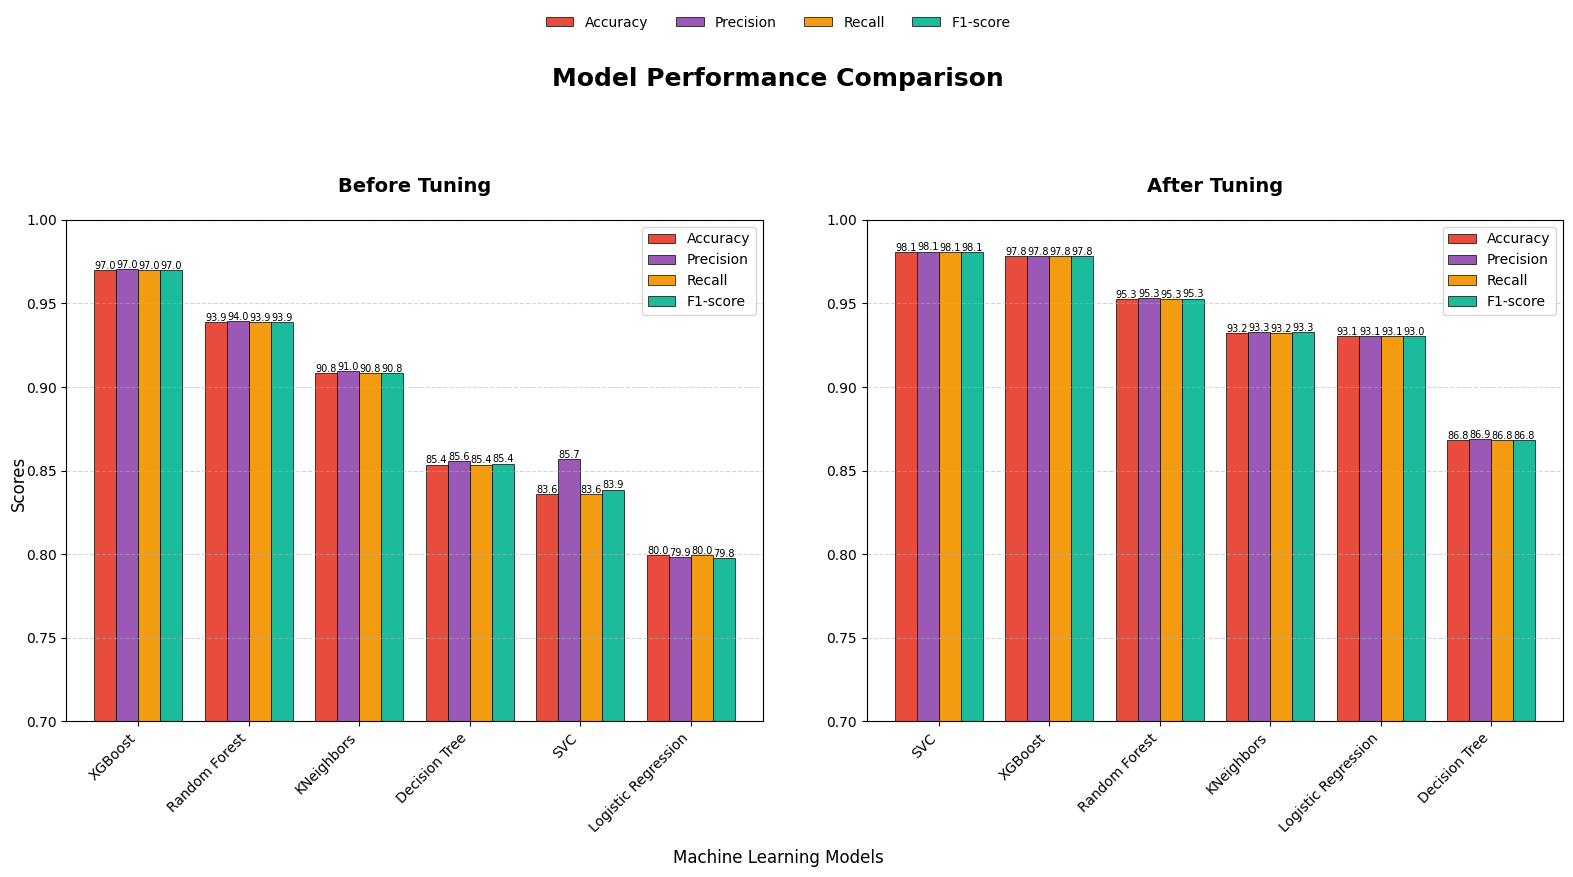

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Convert your dictionaries to DataFrames
df_before = pd.DataFrame.from_dict(results_before_tuning, orient='index',
                                 columns=['Accuracy', 'Precision', 'Recall', 'F1-score'])
df_after = pd.DataFrame.from_dict(results_after_tuning, orient='index',
                                columns=['Accuracy', 'Precision', 'Recall', 'F1-score'])

# Sort by Accuracy
df_before_sorted = df_before.sort_values(by='Accuracy', ascending=False)
df_after_sorted = df_after.sort_values(by='Accuracy', ascending=False)

# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Custom color palette
metrics_colors = ['#e74c3c', '#9b59b6', '#f39c12', '#1abc9c']

# Plot for Before Tuning
df_before_sorted.plot(kind='bar', width=0.8, color=metrics_colors,
                     ax=axes[0], edgecolor='black', linewidth=0.5)
axes[0].set_title("Before Tuning", fontsize=14, pad=20, fontweight='bold')
axes[0].set_xticklabels(df_before_sorted.index, rotation=45, ha='right', size=10)
axes[0].grid(axis='y', linestyle='--', alpha=0.5)
axes[0].set_ylim(0.7, 1.0)

# Add percentage-formatted annotations (79.2 style)
for p in axes[0].patches:
    height = p.get_height()
    axes[0].annotate(f"{height*100:.1f}",
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 3),
                    textcoords='offset points', fontsize=7)

# Plot for After Tuning
df_after_sorted.plot(kind='bar', width=0.8, color=metrics_colors,
                    ax=axes[1], edgecolor='black', linewidth=0.5)
axes[1].set_title("After Tuning", fontsize=14, pad=20, fontweight='bold')
axes[1].set_xticklabels(df_after_sorted.index, rotation=45, ha='right', size=10)
axes[1].grid(axis='y', linestyle='--', alpha=0.5)
axes[1].set_ylim(0.7, 1.0)

# Add percentage-formatted annotations (79.2 style)
for p in axes[1].patches:
    height = p.get_height()
    axes[1].annotate(f"{height*100:.1f}",
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 3),
                    textcoords='offset points', fontsize=7)

# Main title and labels
fig.suptitle("Model Performance Comparison",
            fontsize=18, fontweight='bold', y=1.02)
fig.supxlabel("Machine Learning Models", fontsize=12, y=0.02)
fig.supylabel("Scores", fontsize=12, x=0.02)

# Custom legend placement
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center',
          bbox_to_anchor=(0.5, 1.1), ncol=4, frameon=False, fontsize=10)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(wspace=0.15)

plt.show()

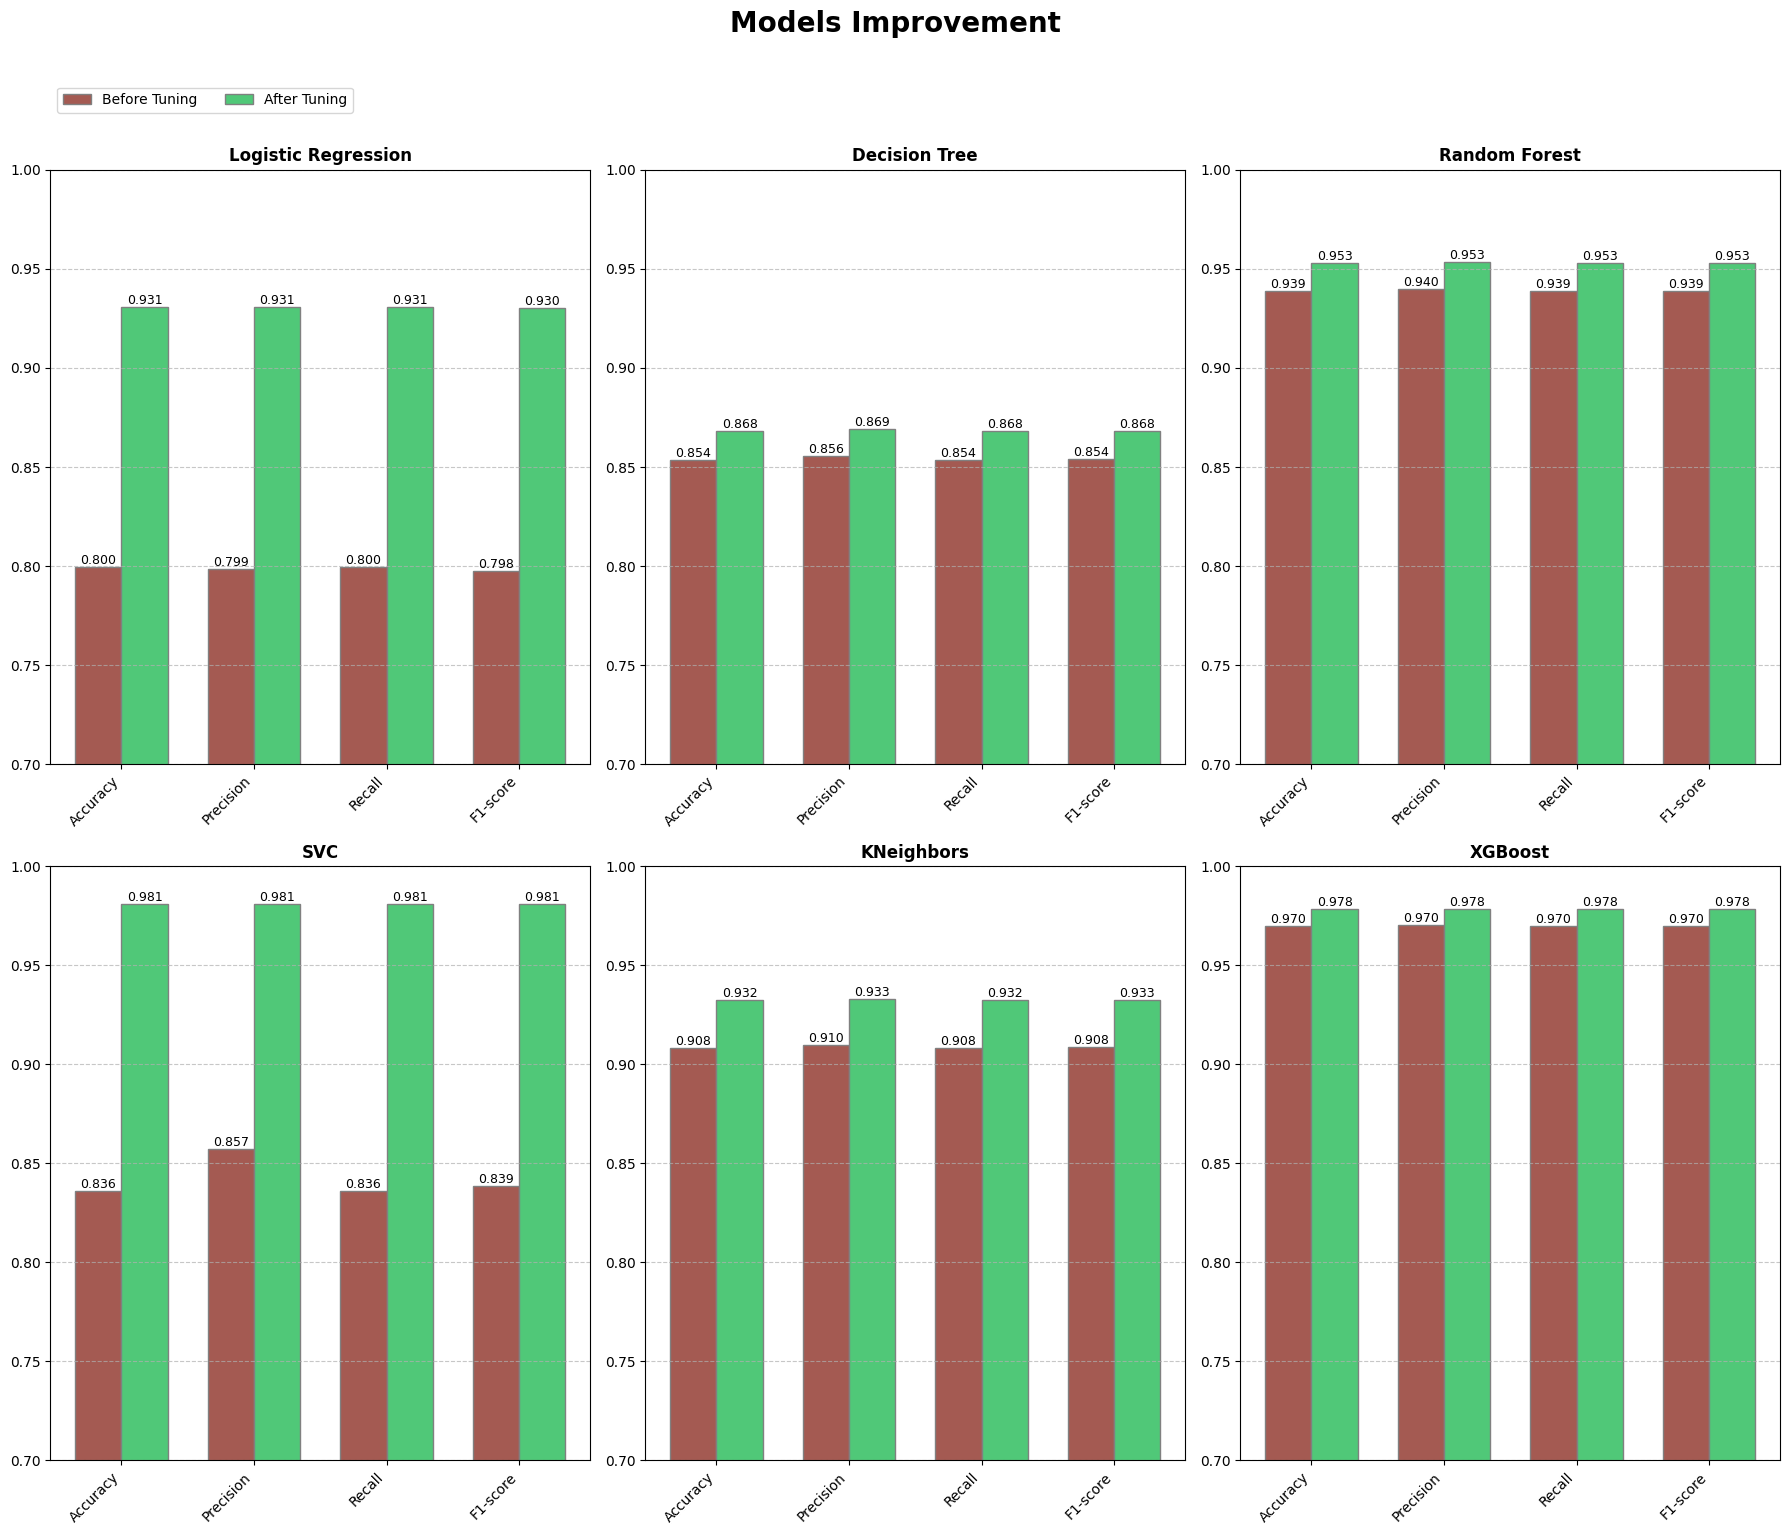

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data from your results
models = [
    'Logistic Regression',
    'Decision Tree',
    'Random Forest',
    'SVC',
    'KNeighbors',
    'XGBoost'
]

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']

# Before tuning results
results_before_tuning = {
    'Logistic Regression': [0.799585, 0.798508, 0.799585, 0.797764],
    'Decision Tree': [0.853583, 0.855773, 0.853583, 0.854184],
    'Random Forest': [0.938733, 0.939686, 0.938733, 0.938756],
    'SVC': [0.835929, 0.857081, 0.835929, 0.838628],
    'KNeighbors': [0.908100, 0.909704, 0.908100, 0.908438],
    'XGBoost': [0.969886, 0.970357, 0.969886, 0.969903]
}

# After tuning results
results_after_tuning = {
    'Logistic Regression': [0.930667, 0.930706, 0.930667, 0.930359],
    'Decision Tree': [0.868086, 0.869012, 0.868086, 0.868076],
    'Random Forest': [0.952740, 0.953360, 0.952740, 0.952854],
    'SVC': [0.980784, 0.981003, 0.980784, 0.980812],
    'KNeighbors': [0.932485, 0.933095, 0.932485, 0.932654],
    'XGBoost': [0.978187, 0.978411, 0.978187, 0.978242]
}

# Create one big figure with subplots
plt.figure(figsize=(18, 15))
plt.suptitle('Models Improvement', fontsize=20, fontweight='bold', y=1.02)

# Create subplots for each model
for i, model in enumerate(models, 1):
    plt.subplot(2, 3, i)

    # Set width of bar
    bar_width = 0.35
    x = np.arange(len(metrics))

    # Get before and after scores
    before = results_before_tuning[model]
    after = results_after_tuning[model]

    # Plot bars
    bars_before = plt.bar(x - bar_width/2, before, width=bar_width,
                         label='Before Tuning', color='#A45A52', edgecolor='grey')
    bars_after = plt.bar(x + bar_width/2, after, width=bar_width,
                        label='After Tuning', color='#50C878', edgecolor='grey')

    # Add labels
    plt.title(model, fontweight='bold')
    plt.xticks(x, metrics, rotation=45, ha='right')
    plt.ylim(0.7, 1.0)

    # Add value labels
    for bar in bars_before:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=9)

    for bar in bars_after:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=9)

    # Add grid
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Only show legend for first subplot
    if i == 1:
        plt.legend(bbox_to_anchor=(0, 1.15), loc='upper left', ncol=2)

plt.tight_layout()
plt.show()

# Model Performance Evaluation Report


1. **Machine Learning Models:**

    We have used 6 models, which are:
    1. Logistic Regression
    2. Decision Tree
    3. Random Forest
    4. SVC
    5. KNeighbors
    6. XGBoost

2. **Evaluation Metrics**

    We evaluated six machine learning models using four standard classification metrics:

    1. Accuracy
    2. Precision
    3. Recall
    4. F1-score

3. **Evaluation Methodology**

  For each model, we conducted two test runs:

  - Default Configuration: Using the model's out-of-box hyperparameters
  - Tuned Configuration: Using optimized hyperparameters found through grid search

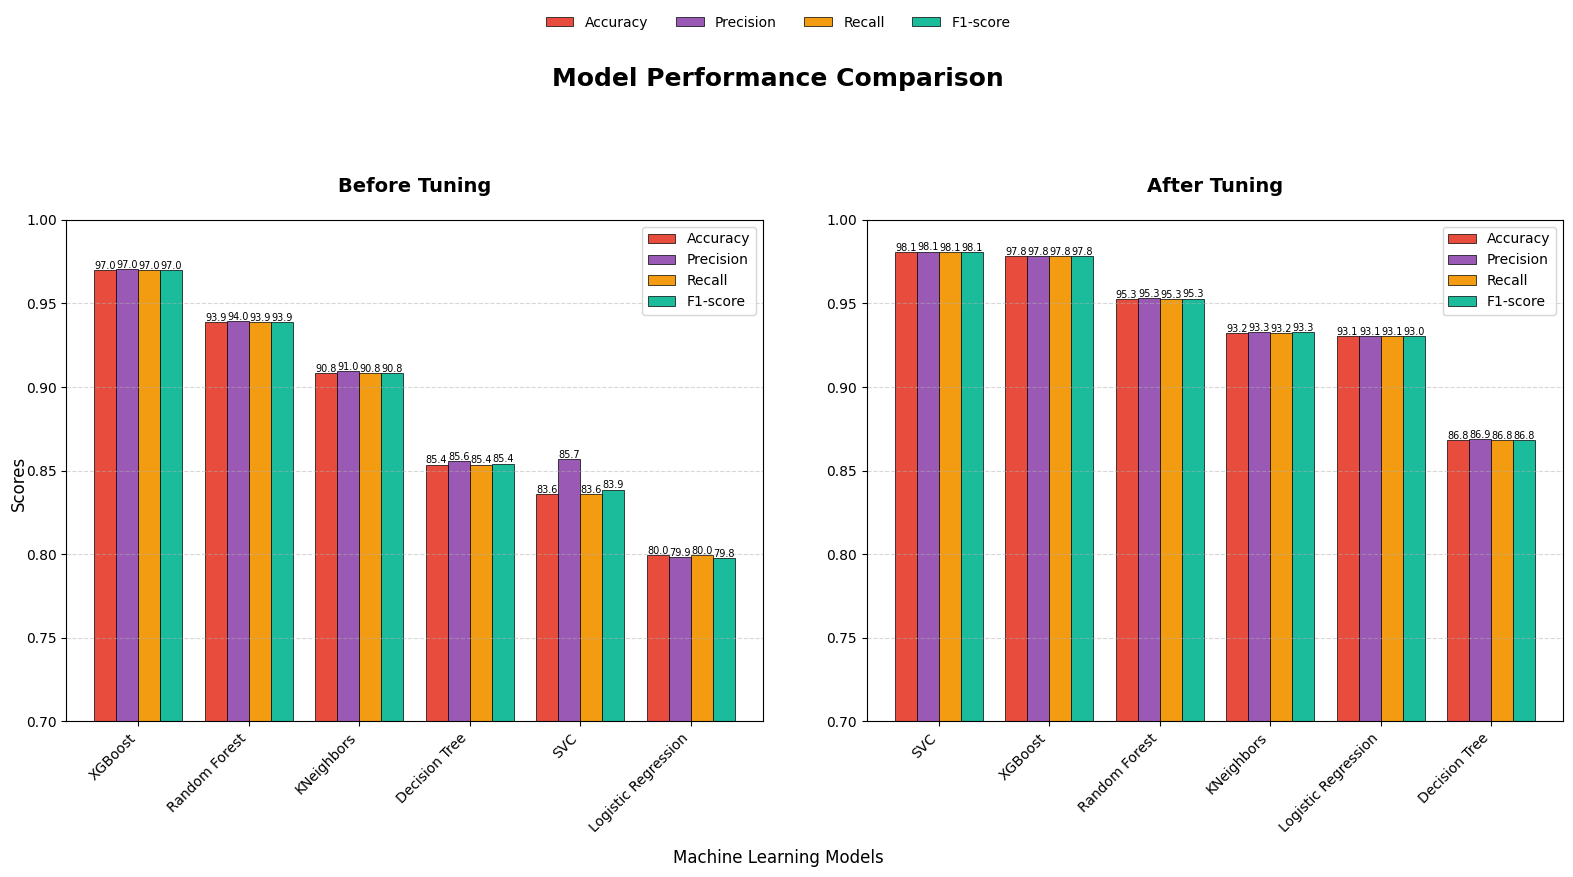

**Key Observations**

- Performance Improvement:
    1. SVC showed the most dramatic improvement (+14.49% accuracy)
    2. Logistic Regression also improved significantly (+13.11% accuracy)
    3. XGBoost maintained consistently high performance

- Top Performers After Tuning:
    1. SVC became the best model after tuning (98.08% accuracy)
    2. XGBoost remained a close second (97.82% accuracy)
    3. Random Forest maintained strong performance (95.27% accuracy)

- Consistency Across Metrics:
    1. All top models showed balanced precision and recall
    2. F1-scores closely matched accuracy scores, indicating good balance

**Conclusion**

Based on the comprehensive evaluation:

1. **Best Performing Model:**

  **SVC** (Support Vector Classifier) emerged as the top model after hyperparameter tuning, achieving 98.08% accuracy and consistently high scores across all metrics.

2. **Recommendations:**

  Primary Choice: Implement the tuned SVC model for production due to its superior performance

  Secondary Option: XGBoost provides excellent performance (97.82%) with potentially faster inference times

# Saving models for further use:

In [ ]:
import pickle

#save the svc
with open('best_model.pkl', 'wb') as f:
  pickle.dump(svm, f)

# save xgboost
with open('2nd_best_model.pkl', 'wb') as f:
    pickle.dump(xgb, f)

['xgb_model.pkl']